# Data Importing

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d ronil8/diamond-price-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/ronil8/diamond-price-prediction-dataset
License(s): unknown
100% 591k/591k [00:00<00:00, 1.01MB/s]
100% 591k/591k [00:00<00:00, 1.01MB/s]


In [ ]:
!unzip diamond-price-prediction-dataset.zip

Archive:  diamond-price-prediction-dataset.zip
  inflating: Diamond Price Prediction.csv  


# Data Reading and understanding

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Diamond Price Prediction.csv")
df

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


1. Carat(Weight of Diamond) -> Weight of Diamond.
2. Cut(Quality) -> Quality of cut(Fair, Good, Very Good, Premium, Ideal).
3. Color -> Diamond Color(from J -> 'worst' to D -> 'Best').
4. Clarity -> Measurement of Transparency(how clear the Diamond is)
                  Sequence of clarity ( I1 (worst quality), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(best quality) ).
5. Table -> Width of top of a Diamond.
6. Price(in US dollars) -> Price of Diamond in US dollars.
7. X(length) -> Length of Diamond in mm.
8. Y(width) -> Width of Diamond in mm.
9. Z(depth) -> Depth of Diamond in mm.
10. Depth -> Total depth percentage. It can calculated by a simple formula.
                  Total Depth % = z / mean(x , y) or z * 2 / (x + y).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()

,Carat(Weight of Daimond),Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Duplication Check

In [ ]:
df.duplicated().sum()

146

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Label encoding for non numeric values

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
cut_mapping = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

color_mapping = {
    'D': 7,
    'E': 6,
    'F': 5,
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 1
}

clarity_mapping = {
    'I1': 1,
    'SI2': 2,
    'SI1': 3,
    'VS2': 4,
    'VS1': 5,
    'VVS2': 6,
    'VVS1': 7,
    'IF': 8
}


In [ ]:
# Applying the mappings
df['Cut(Quality)'] = df['Cut(Quality)'].map(cut_mapping)
df['Color'] = df['Color'].map(color_mapping)
df['Clarity'] = df['Clarity'].map(clarity_mapping)

# Verify the encoding
print(df[['Cut(Quality)', 'Color', 'Clarity']].head())

   Cut(Quality)  Color  Clarity
0             5      6        2
1             4      6        3
2             2      6        5
3             4      2        4
4             2      1        2


In [ ]:
df.head(10)

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
6,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47
7,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53
8,0.22,1,6,4,65.1,61.0,337,3.87,3.78,2.49
9,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39


# Data Visualization

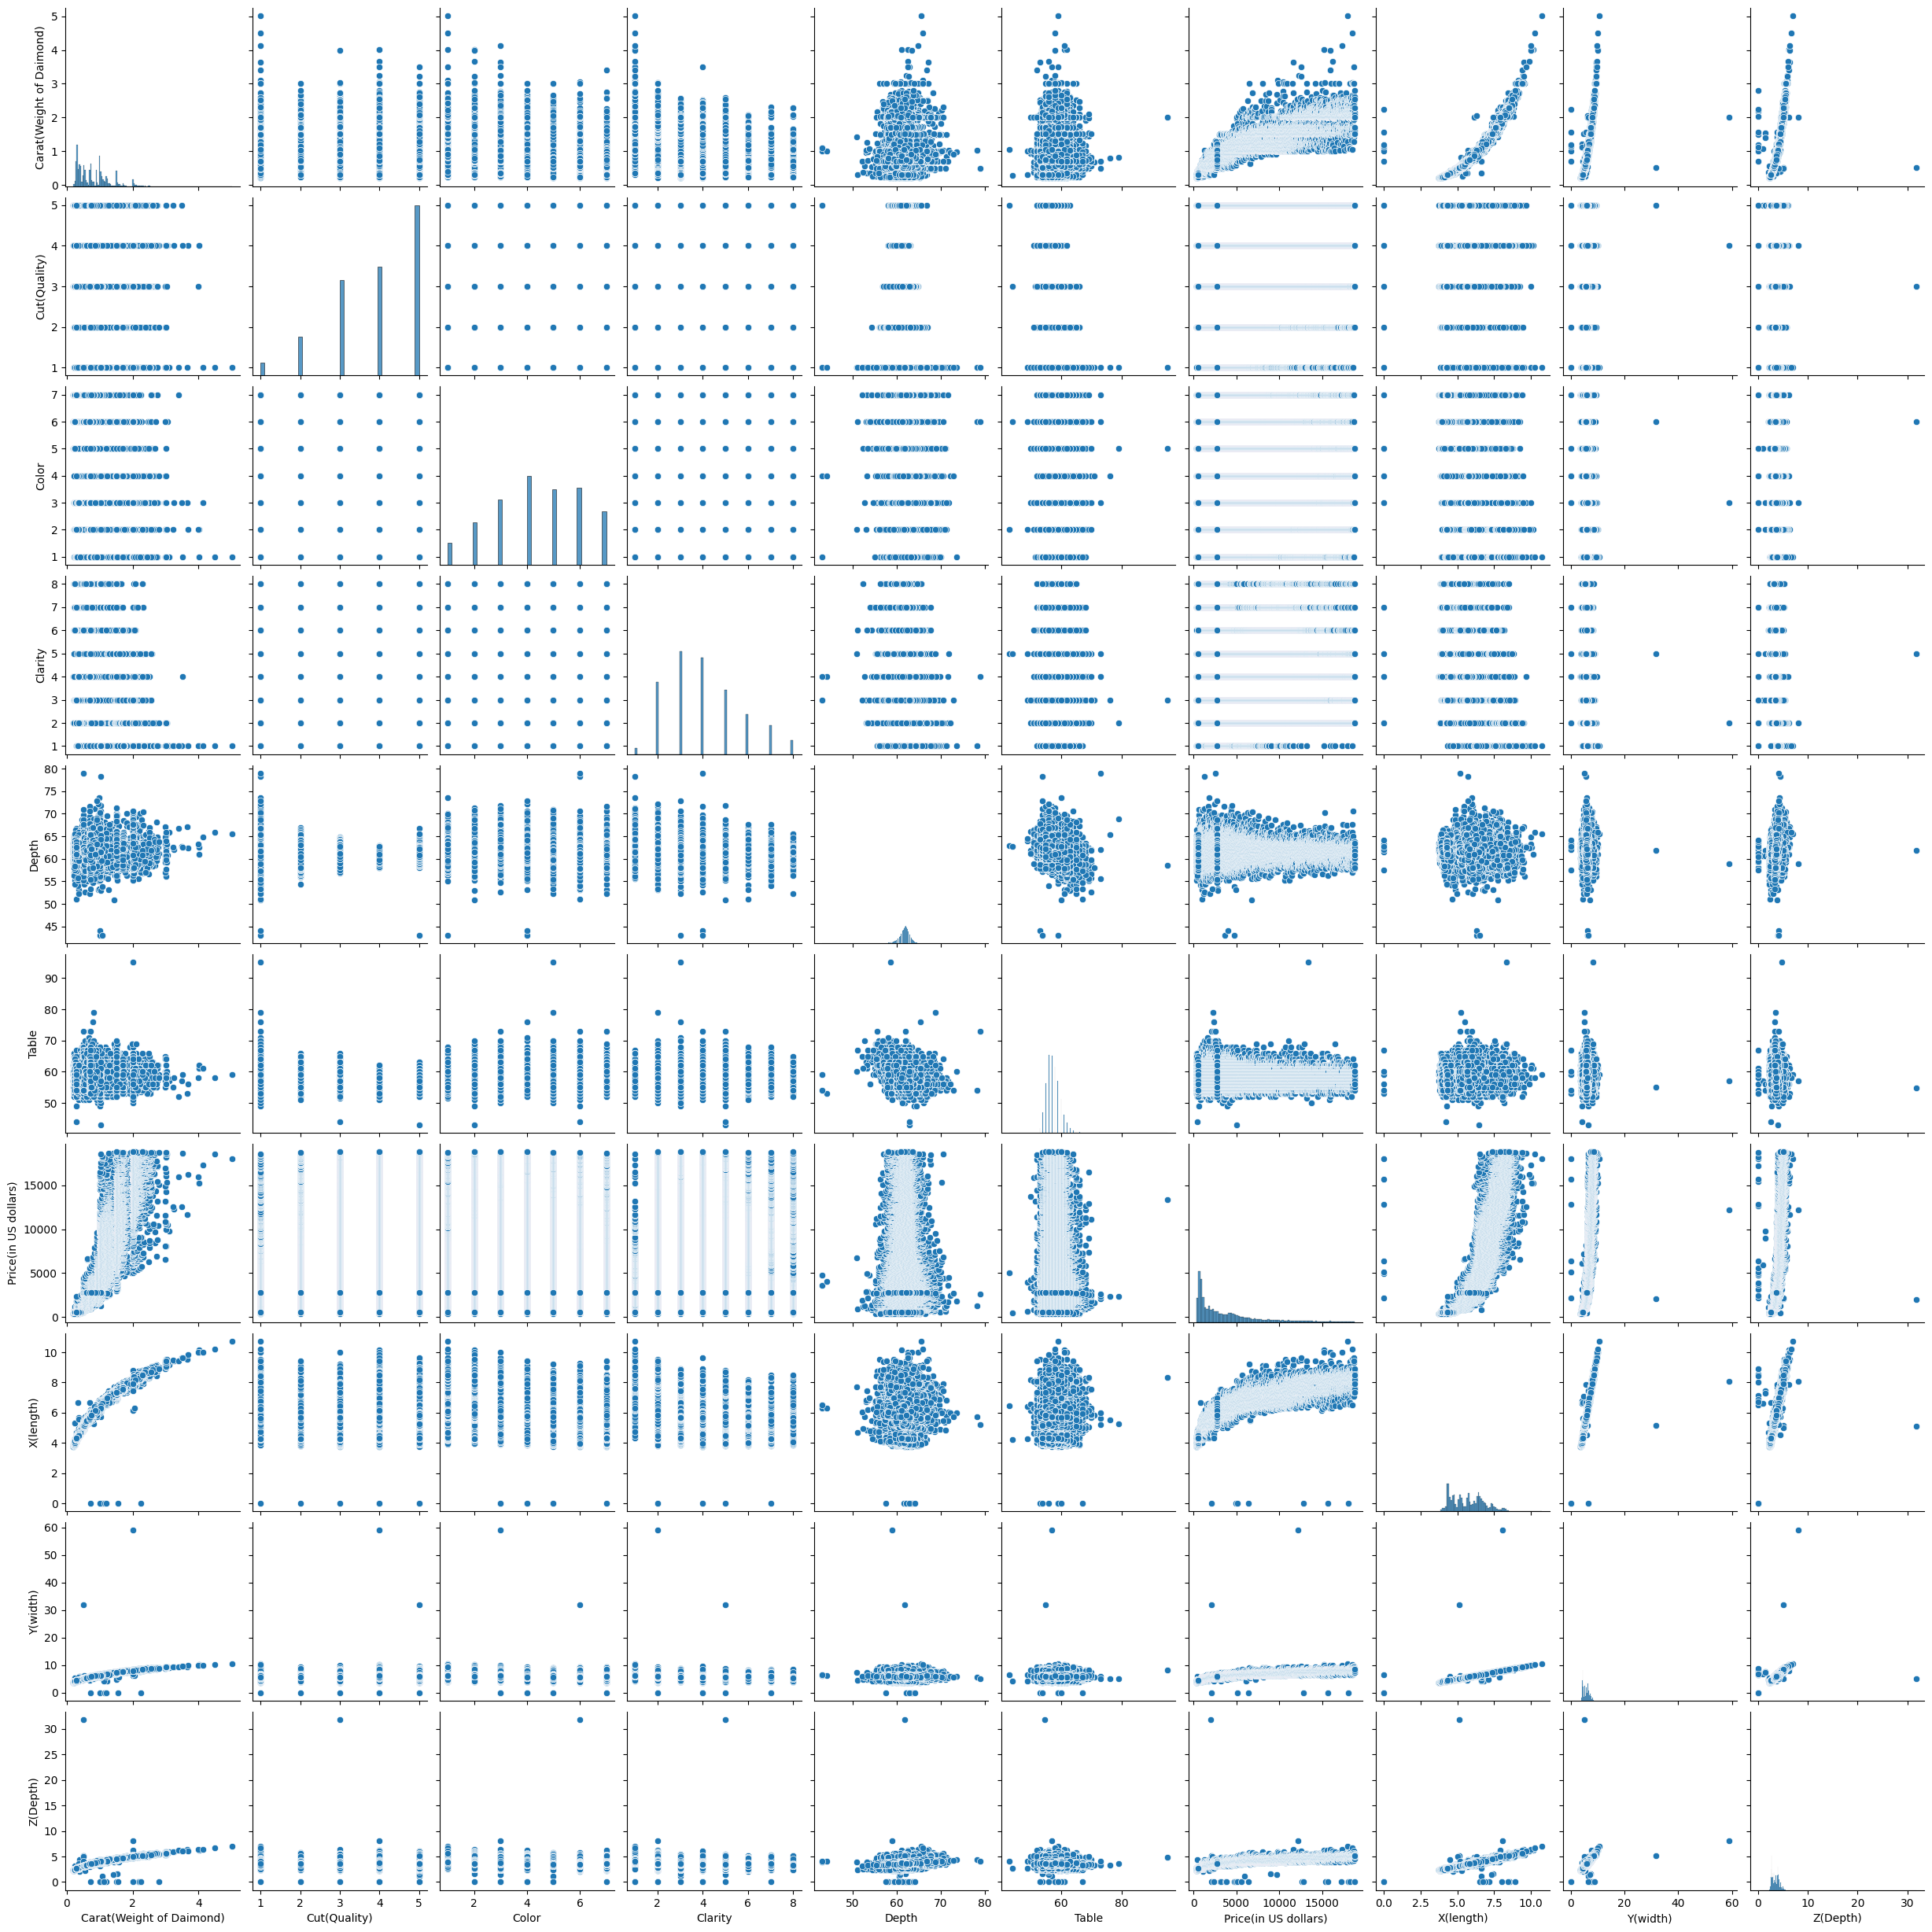

In [ ]:
sns.pairplot(df)
plt.show()

# Outliers Checking and Removal

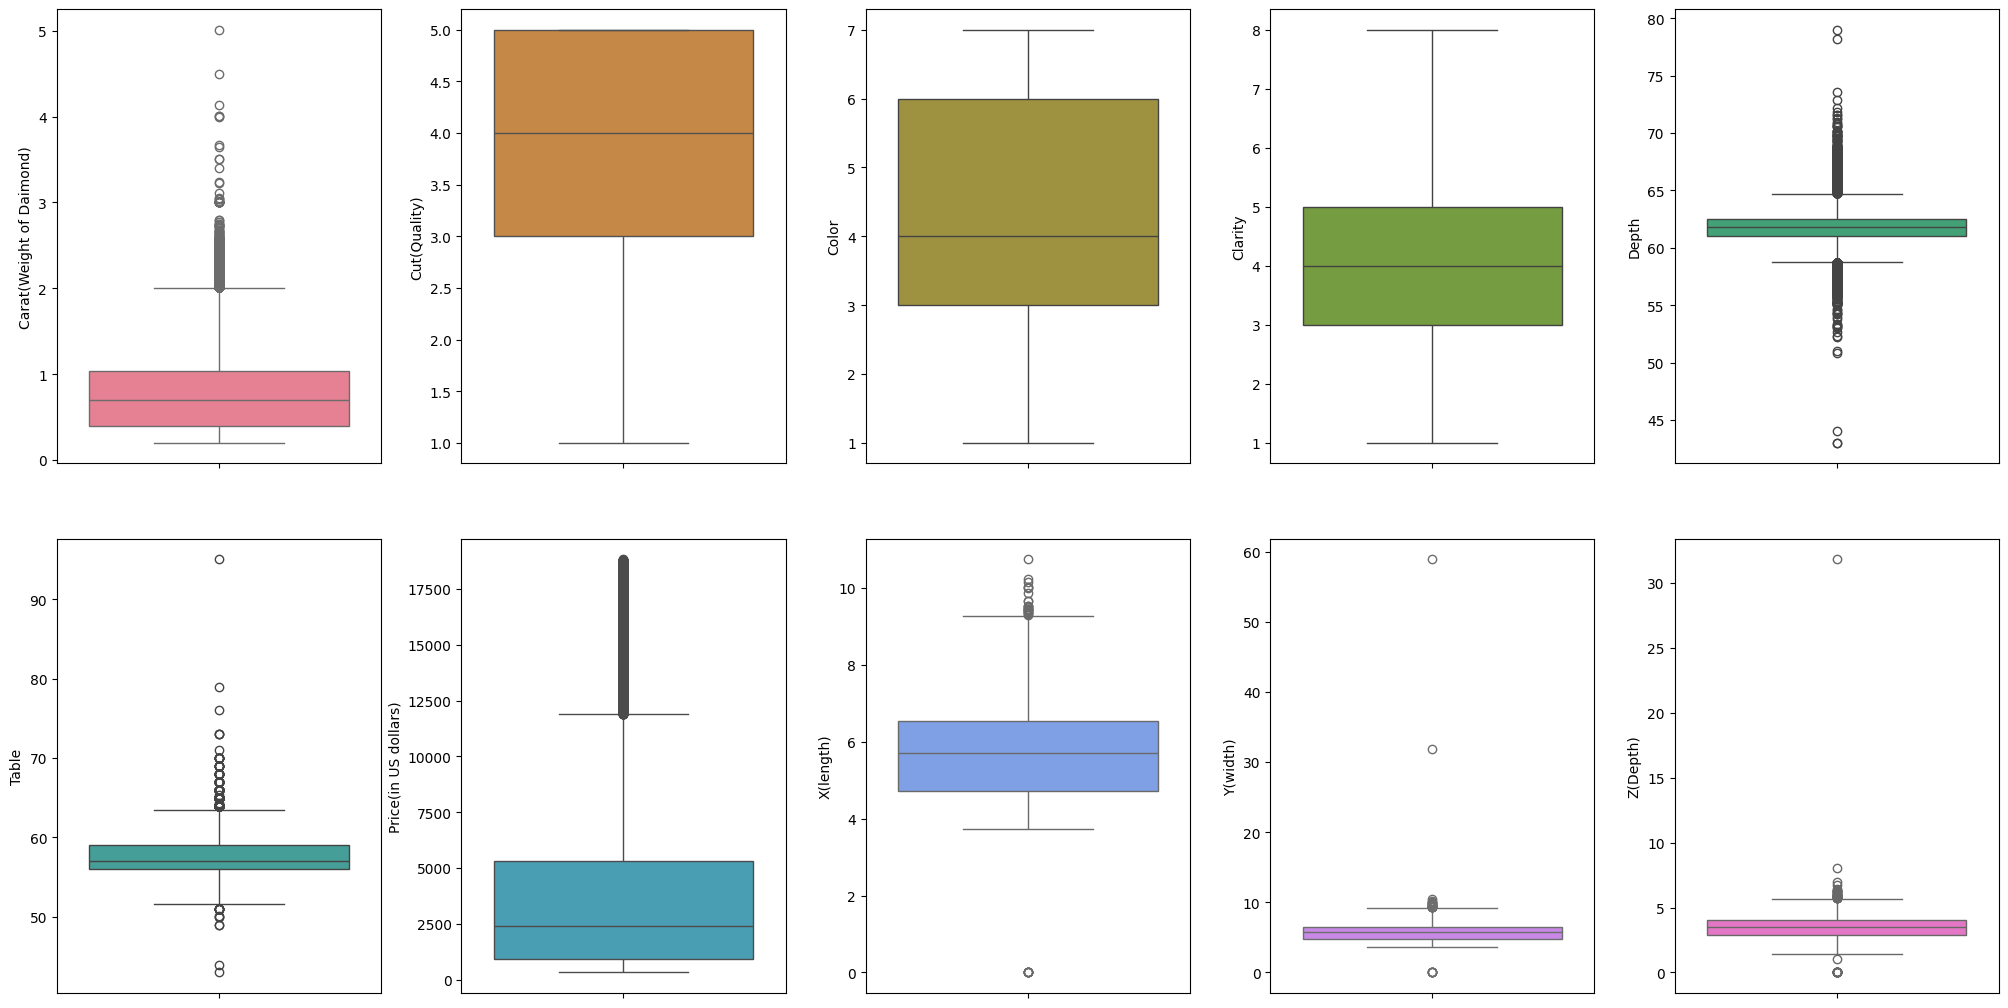

In [ ]:
colors = sns.color_palette("husl", len(df.keys()))
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.boxplot(y=v, data=df, ax=axs[index], color=colors[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
numeric_columns = ['Carat(Weight of Daimond)', 'Depth', 'Table', 'Price(in US dollars)', 'X(length)', 'Y(width)', 'Z(Depth)']
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

for col in numeric_columns:
    df = remove_outliers(df, col)


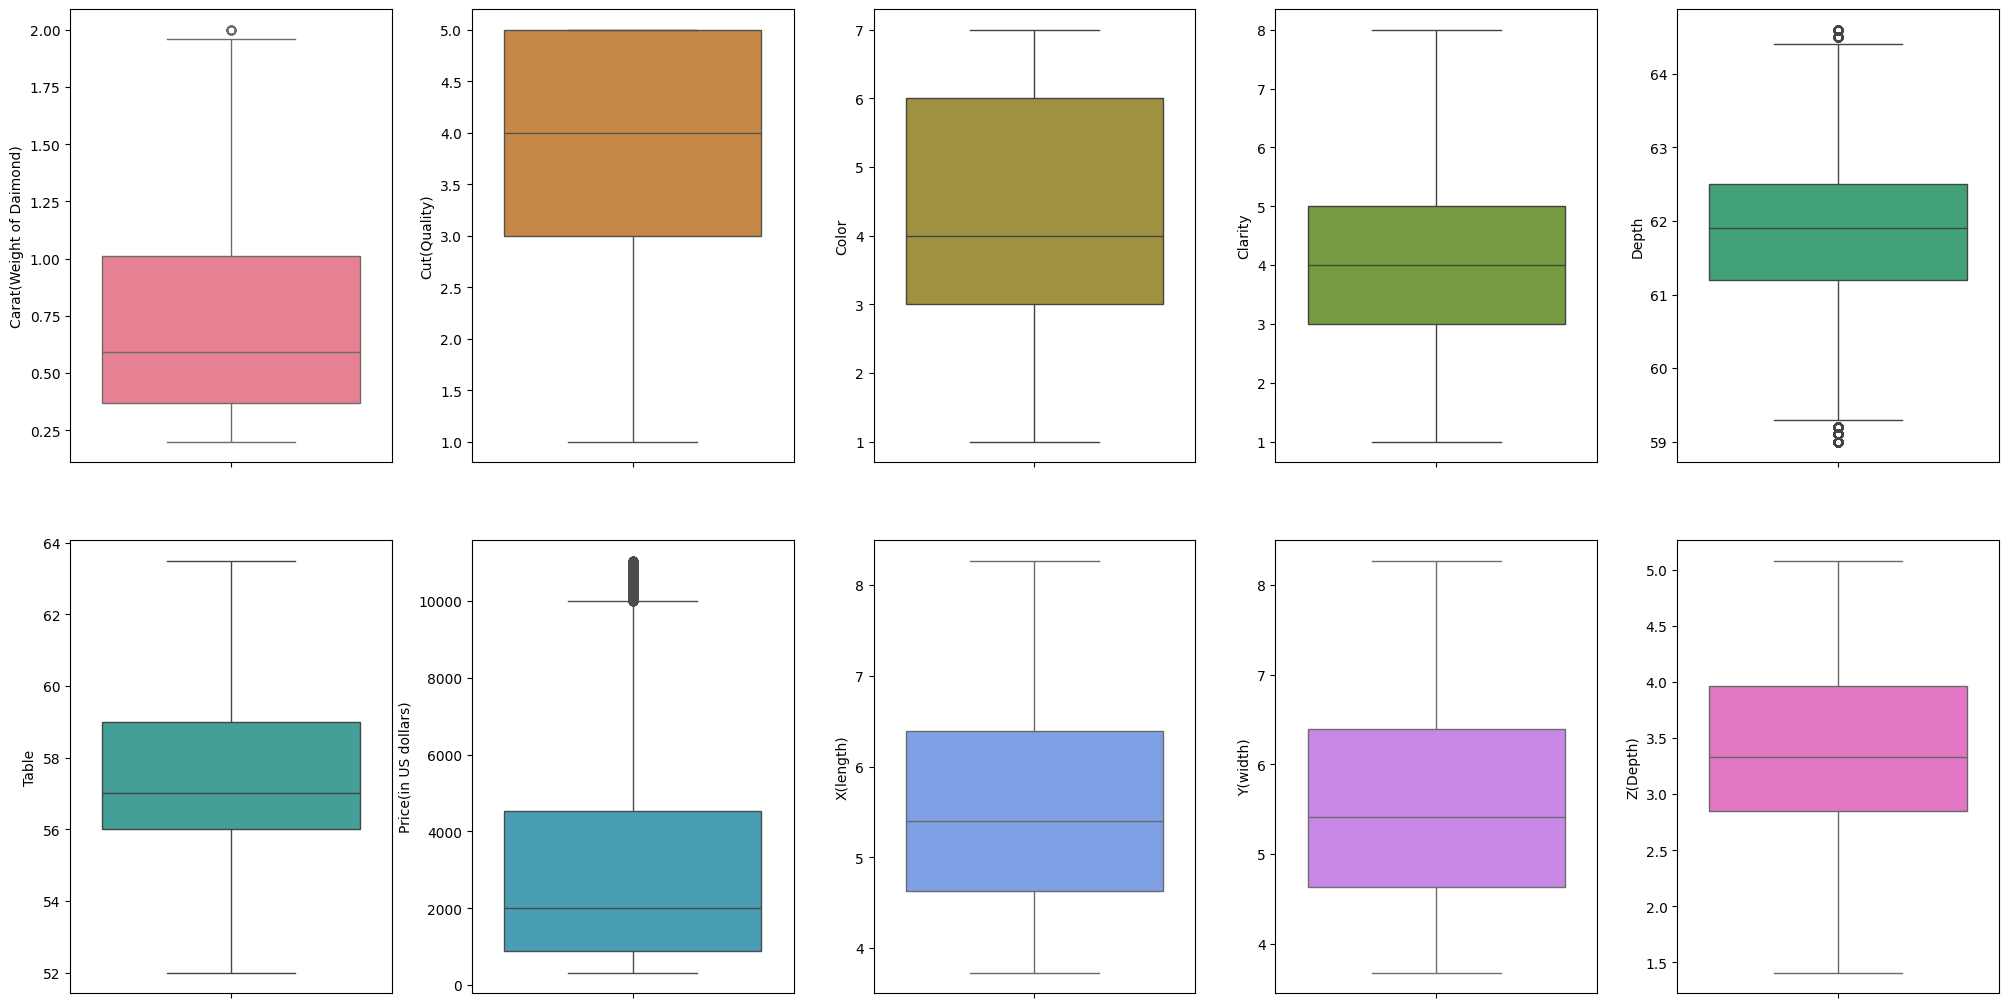

In [ ]:
colors = sns.color_palette("husl", len(df.keys()))
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.boxplot(y=v, data=df, ax=axs[index], color=colors[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

# Distribution and Skewness handling

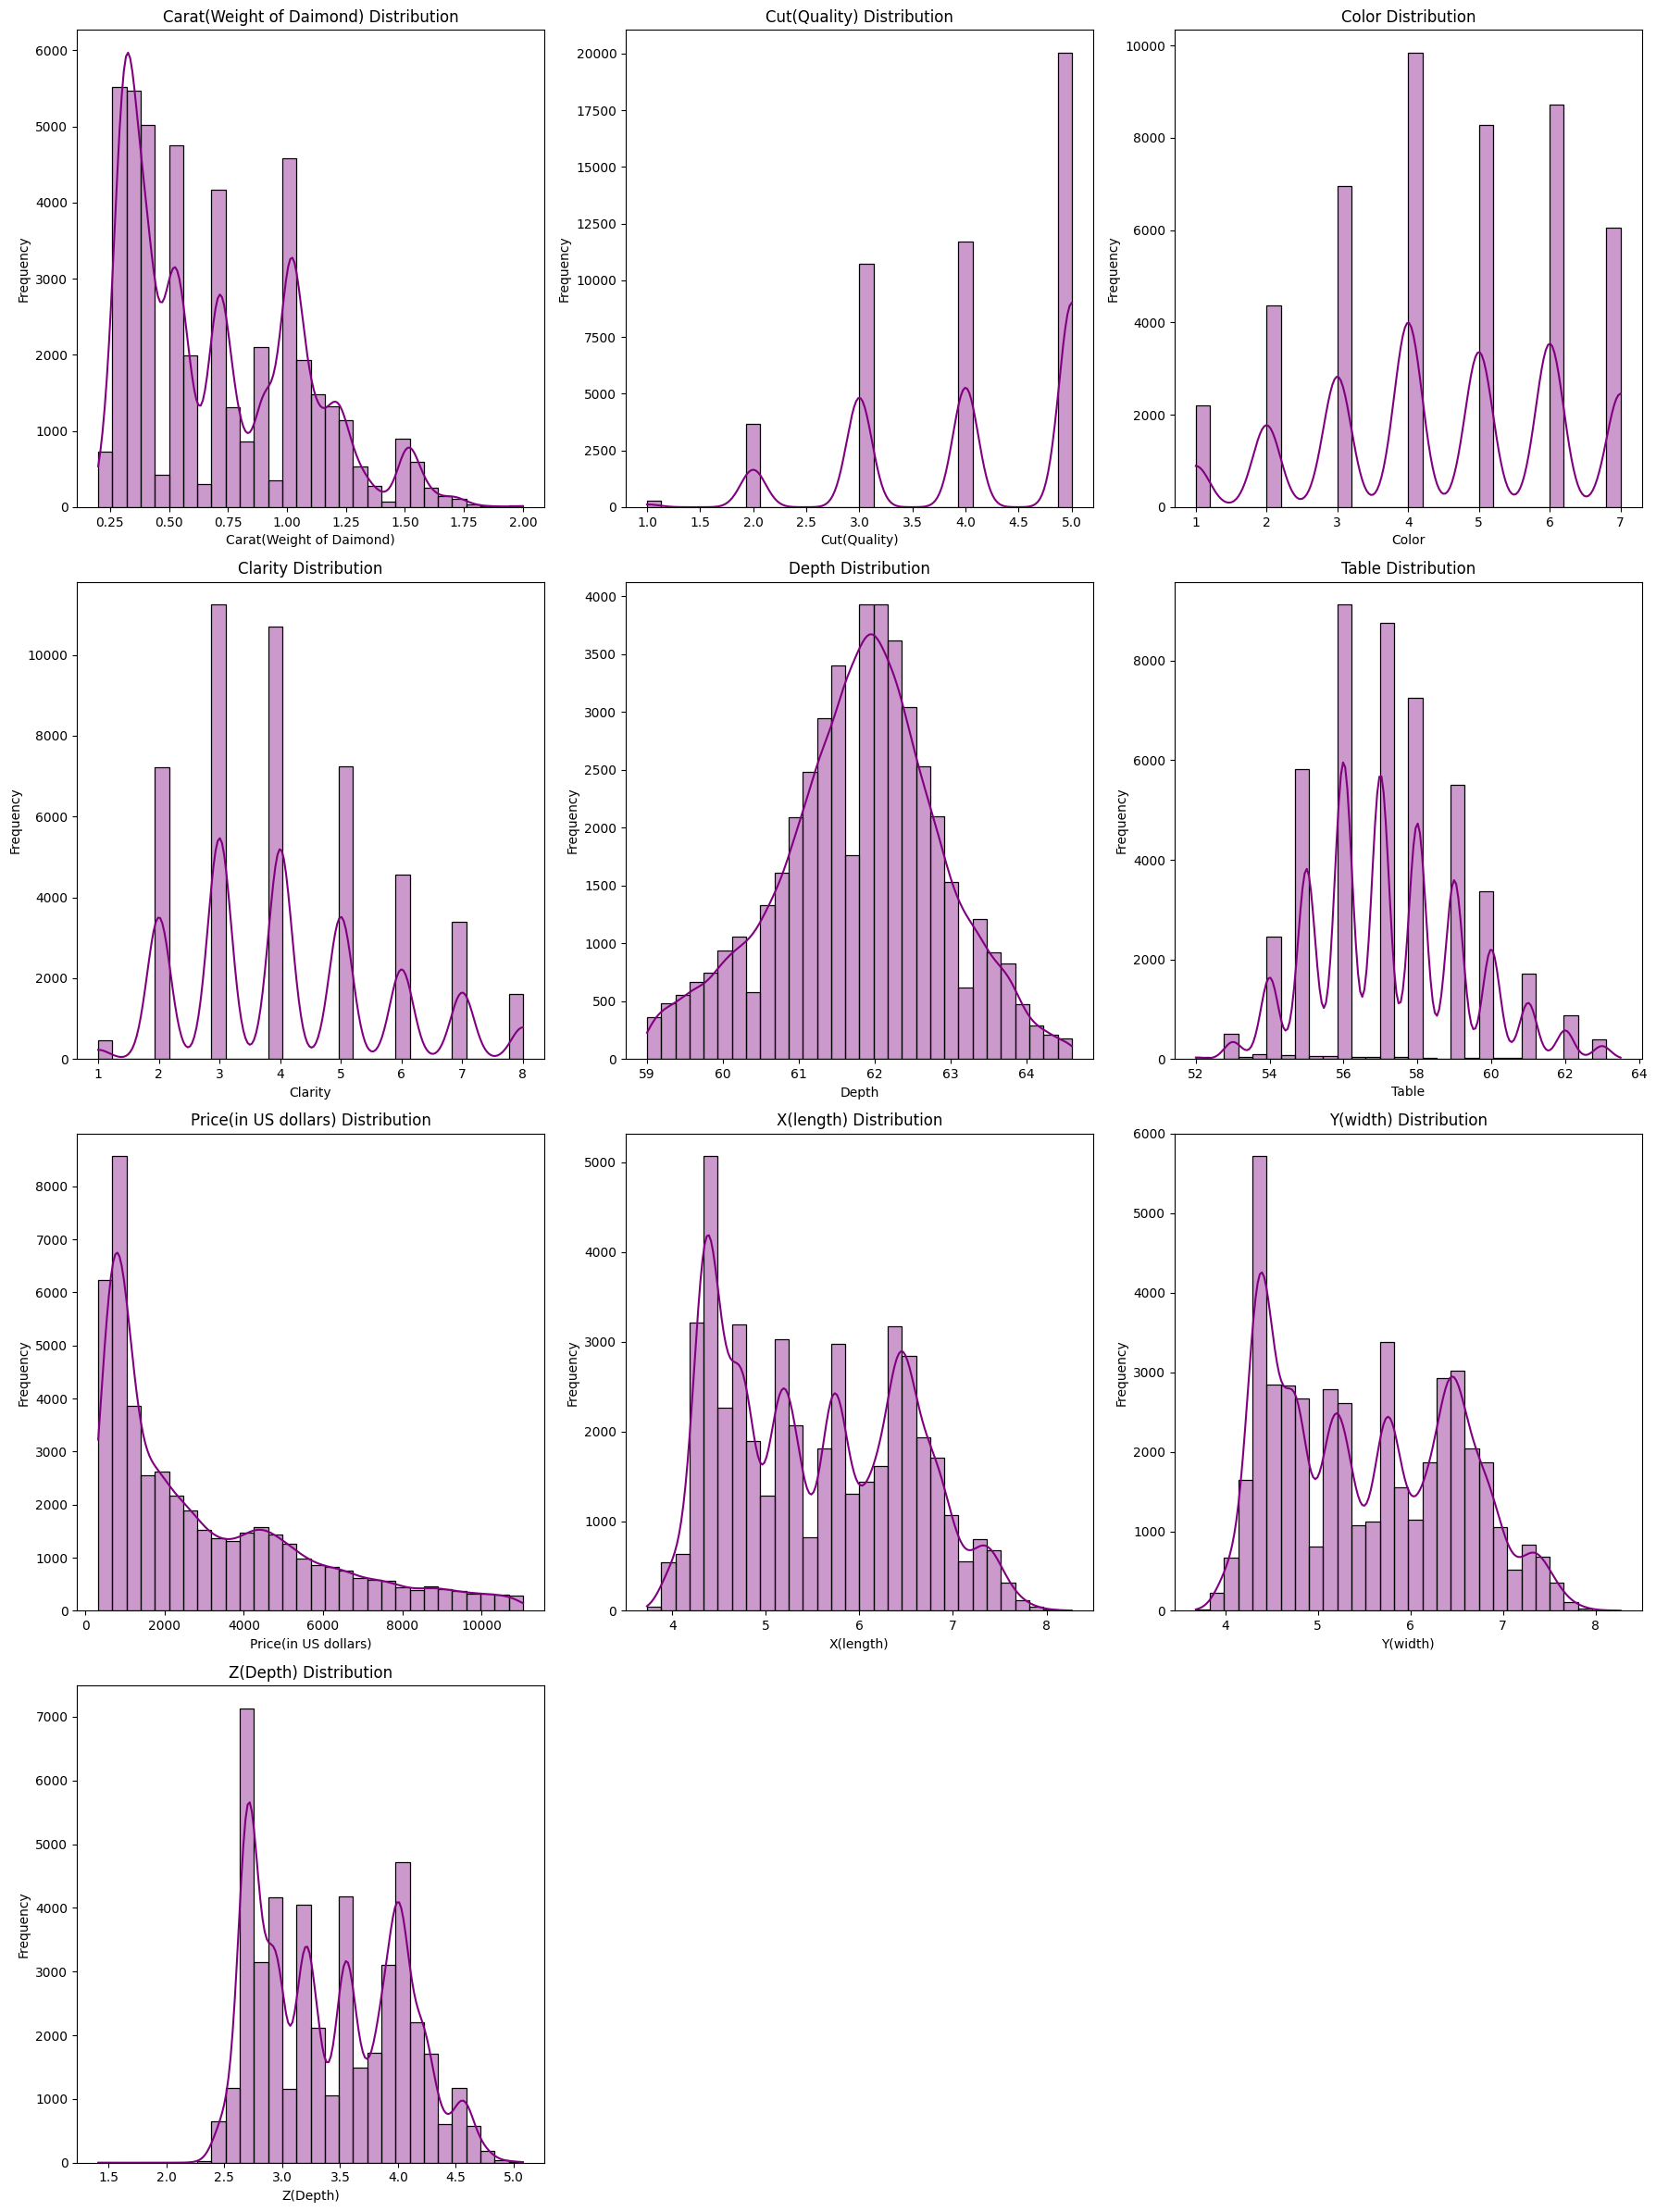

In [ ]:
row = (len(df.columns) // 3) + (len(df.columns) % 3 > 0)
fig, axe = plt.subplots(row, 3, figsize=(18, row * 6))
axe = axe.flatten()
for i, col in enumerate(df.columns):
    sns.histplot(df[col], color='purple',alpha=0.4, kde=True, bins=30, ax=axe[i])
    axe[i].set_title(f'{col} Distribution')
    axe[i].set_xlabel(col)
    axe[i].set_ylabel('Frequency')

for k in range(i + 1, len(axe)):
    fig.delaxes(axe[k])
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46425 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  46425 non-null  float64
 1   Cut(Quality)              46425 non-null  int64  
 2   Color                     46425 non-null  int64  
 3   Clarity                   46425 non-null  int64  
 4   Depth                     46425 non-null  float64
 5   Table                     46425 non-null  float64
 6   Price(in US dollars)      46425 non-null  int64  
 7   X(length)                 46425 non-null  float64
 8   Y(width)                  46425 non-null  float64
 9   Z(Depth)                  46425 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 3.9 MB


In [ ]:
numeric_columns = ['Carat(Weight of Daimond)', 'Depth', 'Table', 'Price(in US dollars)', 'X(length)', 'Y(width)', 'Z(Depth)']

print(df[numeric_columns].describe())

       Carat(Weight of Daimond)         Depth         Table  \
count              46425.000000  46425.000000  46425.000000   
mean                   0.698218     61.803673     57.239968   
std                    0.361951      1.077656      2.013965   
min                    0.200000     59.000000     52.000000   
25%                    0.370000     61.200000     56.000000   
50%                    0.590000     61.900000     57.000000   
75%                    1.010000     62.500000     59.000000   
max                    2.000000     64.600000     63.500000   

       Price(in US dollars)     X(length)      Y(width)      Z(Depth)  
count          46425.000000  46425.000000  46425.000000  46425.000000  
mean            3001.342768      5.522105      5.527182      3.414310  
std             2599.798006      0.964303      0.958496      0.597123  
min              326.000000      3.730000      3.680000      1.410000  
25%              881.000000      4.630000      4.630000      2.850000  


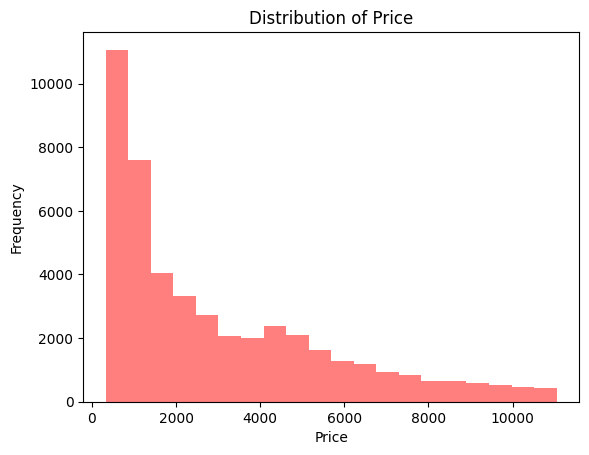

In [ ]:
plt.hist(df['Price(in US dollars)'],color='red',alpha=0.5, bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [ ]:
import numpy as np
import scipy.stats as stats

In [ ]:
def log_transform(x):
    return np.log1p(x)  # log1p(x) is log(x + 1)

def sqrt_transform(x):
    return np.sqrt(x)

def square_transform(x):
    return x ** 2

def boxcox_transform(x):
    # Add a small constant to avoid issues with zero or negative values
    return stats.boxcox(x + 1)[0]

# Apply transformations based on skewness
def transform_column(df, column_name, skewness):
    if skewness > 1:  # Positive skew
        if df[column_name].min() > 0:
            df[column_name] = log_transform(df[column_name])
        else:
            df[column_name] = boxcox_transform(df[column_name])
    elif skewness < -1:  # Negative skew
        df[column_name] = square_transform(df[column_name])
    else:  # Near normal
        if skewness > 0:
            df[column_name] = sqrt_transform(df[column_name])
        else:
            pass
for col in df[numeric_columns]:
    skewness = df[col].skew()
    transform_column(df, col, skewness)

# Optionally, check skewness again after transformation
skewness = df[numeric_columns].apply(lambda x: x.skew())
print(skewness)

Carat(Weight of Daimond)    0.349893
Depth                      -0.197123
Table                       0.352303
Price(in US dollars)        0.063027
X(length)                   0.151844
Y(width)                    0.146791
Z(Depth)                    0.147030
dtype: float64


# Feature Selection

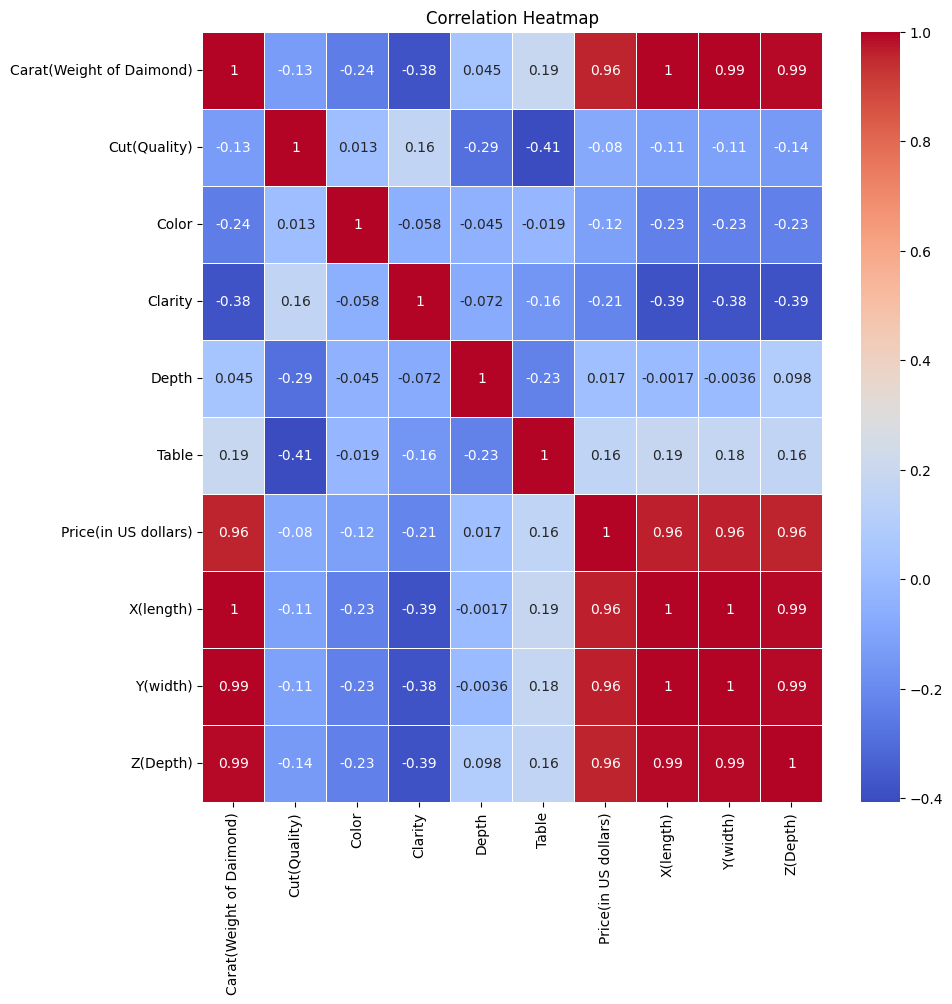

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import statsmodels.api as sm
df2=df.copy()
X = df2.drop('Price(in US dollars)',axis=1)
Y = df2['Price(in US dollars)']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Price(in US dollars)   R-squared:                       0.976
Model:                              OLS   Adj. R-squared:                  0.976
Method:                   Least Squares   F-statistic:                 2.124e+05
Date:                  Wed, 11 Sep 2024   Prob (F-statistic):               0.00
Time:                          20:08:36   Log-Likelihood:                 25322.
No. Observations:                 46425   AIC:                        -5.062e+04
Df Residuals:                     46415   BIC:                        -5.054e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

In [ ]:
df2.describe()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
count,46425.000000,46425.000000,46425.000000,46425.000000,46425.000000,46425.000000,46425.000000,46425.000000,46425.000000,46425.000000
mean,0.808075,4.024987,4.464599,4.126828,61.803673,7.564546,7.616346,2.341005,2.342200,1.840754
std,0.212683,1.015020,1.685153,1.642987,1.077656,0.132700,0.910920,0.204454,0.203175,0.161041
min,0.447214,1.000000,1.000000,1.000000,59.000000,7.211103,5.789960,1.931321,1.918333,1.187434
25%,0.608276,3.000000,3.000000,3.000000,61.200000,7.483315,6.782192,2.151743,2.151743,1.688194
50%,0.768115,4.000000,4.000000,4.000000,61.900000,7.549834,7.604894,2.323790,2.325941,1.824829
75%,1.004988,5.000000,6.000000,5.000000,62.500000,7.681146,8.417373,2.527845,2.527845,1.989975
max,1.414214,5.000000,7.000000,8.000000,64.600000,7.968689,9.310005,2.875761,2.875761,2.253886


# Classification

In [ ]:
df2['Price_Class'] = pd.cut(df2['Price(in US dollars)'], bins=3, right=False) #low, medium, high

print(df2['Price_Class'].value_counts())

Price_Class
[8.137, 9.314)    16066
[6.963, 8.137)    15236
[5.79, 6.963)     15123
Name: count, dtype: int64


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46425 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Carat(Weight of Daimond)  46425 non-null  float64 
 1   Cut(Quality)              46425 non-null  int64   
 2   Color                     46425 non-null  int64   
 3   Clarity                   46425 non-null  int64   
 4   Depth                     46425 non-null  float64 
 5   Table                     46425 non-null  float64 
 6   Price(in US dollars)      46425 non-null  float64 
 7   X(length)                 46425 non-null  float64 
 8   Y(width)                  46425 non-null  float64 
 9   Z(Depth)                  46425 non-null  float64 
 10  Price_Class               46425 non-null  category
dtypes: category(1), float64(7), int64(3)
memory usage: 3.9 MB


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Ensure that Price_Class is categorized into 3 bins (classes) {low, medium, high}
df2['Price_Class'] = pd.cut(df2['Price(in US dollars)'], bins=3, labels=False)  # Convert to numeric labels

# Prepare features and target variable for classification
X = df2.drop(['Price_Class', 'Price(in US dollars)'], axis=1)  # Features
y = df2['Price_Class']  # Target (Price Class)

# Ensure y is treated as a categorical variable
y = y.astype(int)  # Make sure the target variable is of integer type (discrete)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split data into training and testing sets after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with regularization
log_reg = LogisticRegression(max_iter=500, random_state=42, C=0.1)  # Reduced C for stronger regularization

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Output the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9461
Precision: 0.9460
Recall: 0.9461

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3191
           1       0.92      0.92      0.92      3255
           2       0.96      0.96      0.96      3194

    accuracy                           0.95      9640
   macro avg       0.95      0.95      0.95      9640
weighted avg       0.95      0.95      0.95      9640



# Clustering

In [ ]:
df_copy=df2.copy()
df_copy

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth),Price_Class
0,0.479583,5,6,2,61.5,7.416198,5.789960,1.987461,1.994994,1.558846,0
1,0.458258,4,6,3,59.8,7.810250,5.789960,1.972308,1.959592,1.519868,0
3,0.538516,4,2,4,62.4,7.615773,5.814131,2.049390,2.056696,1.621727,0
4,0.556776,2,1,2,63.3,7.615773,5.817111,2.083267,2.085665,1.658312,0
5,0.489898,3,1,6,62.8,7.549834,5.820083,1.984943,1.989975,1.574802,0
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.848528,5,7,3,60.8,7.549834,7.922261,2.397916,2.400000,1.870829,1
53936,0.848528,2,7,3,63.1,7.416198,7.922261,2.385372,2.397916,1.900000,1
53937,0.836660,3,7,3,62.8,7.745967,7.922261,2.379075,2.383275,1.886796,1
53938,0.927362,4,3,2,61.0,7.615773,7.922261,2.479919,2.473863,1.933908,1


In [ ]:
# Display summary statistics of the features
print(df_copy.describe())

       Carat(Weight of Daimond)  Cut(Quality)         Color       Clarity  \
count              46425.000000  46425.000000  46425.000000  46425.000000   
mean                   0.808075      4.024987      4.464599      4.126828   
std                    0.212683      1.015020      1.685153      1.642987   
min                    0.447214      1.000000      1.000000      1.000000   
25%                    0.608276      3.000000      3.000000      3.000000   
50%                    0.768115      4.000000      4.000000      4.000000   
75%                    1.004988      5.000000      6.000000      5.000000   
max                    1.414214      5.000000      7.000000      8.000000   

              Depth         Table  Price(in US dollars)     X(length)  \
count  46425.000000  46425.000000          46425.000000  46425.000000   
mean      61.803673      7.564546              7.616346      2.341005   
std        1.077656      0.132700              0.910920      0.204454   
min       59.0

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans

In [ ]:
X = df_copy.drop(['Price(in US dollars)', 'Price_Class'], axis=1)  # Drop target variable

# Calculate Mutual Information Scores for Feature Relevance
y = df_copy['Price_Class']

In [ ]:
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display the scores
print("Feature Relevance Scores (Mutual Information):")
print(mi_scores)

Feature Relevance Scores (Mutual Information):
Y(width)                    0.865235
Carat(Weight of Daimond)    0.861825
X(length)                   0.861064
Z(Depth)                    0.854277
Clarity                     0.043542
Table                       0.020029
Color                       0.018154
Cut(Quality)                0.012211
Depth                       0.007386
dtype: float64


In [ ]:
top_features = mi_scores.head(4).index.tolist()
print(f"Selected Features for Clustering: {top_features}")

Selected Features for Clustering: ['Y(width)', 'Carat(Weight of Daimond)', 'X(length)', 'Z(Depth)']


In [ ]:
# Standardize the Selected Features for Clustering
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(df_copy[top_features])


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
df_copy['Cluster'] = kmeans.fit_predict(X_selected_scaled)
print(df_copy['Cluster'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
1    16972
0    15978
2    13475
Name: count, dtype: int64


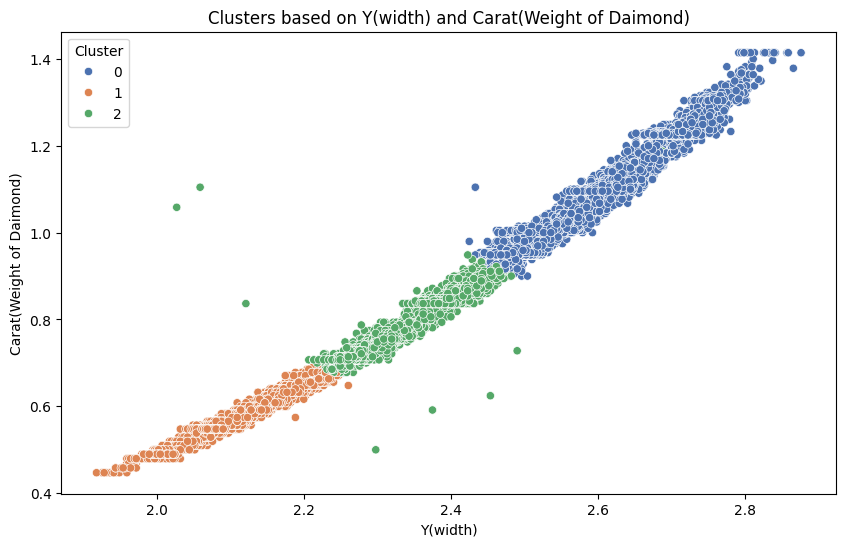

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_copy[top_features[0]], y=df_copy[top_features[1]], hue=df_copy['Cluster'], palette="deep")
plt.title(f"Clusters based on {top_features[0]} and {top_features[1]}")
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.show()

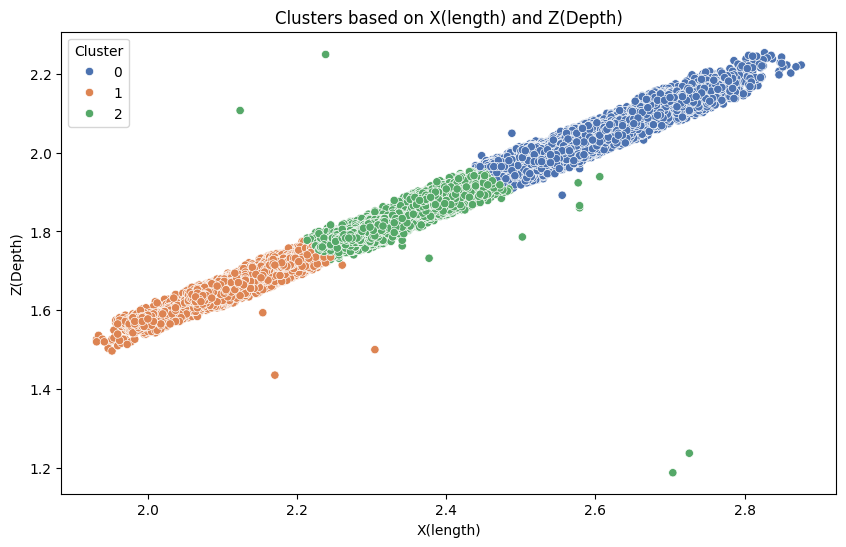

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_copy[top_features[2]], y=df_copy[top_features[3]], hue=df_copy['Cluster'], palette="deep")
plt.title(f"Clusters based on {top_features[2]} and {top_features[3]}")
plt.xlabel(top_features[2])
plt.ylabel(top_features[3])
plt.show()

In [ ]:
df_copy.head(10)

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth),Price_Class,Cluster
0,0.479583,5,6,2,61.5,7.416198,5.789960,1.987461,1.994994,1.558846,0,1
1,0.458258,4,6,3,59.8,7.810250,5.789960,1.972308,1.959592,1.519868,0,1
3,0.538516,4,2,4,62.4,7.615773,5.814131,2.049390,2.056696,1.621727,0,1
4,0.556776,2,1,2,63.3,7.615773,5.817111,2.083267,2.085665,1.658312,0,1
5,0.489898,3,1,6,62.8,7.549834,5.820083,1.984943,1.989975,1.574802,0,1
6,0.489898,3,2,7,62.3,7.549834,5.820083,1.987461,1.994994,1.571623,0,1
7,0.509902,3,3,3,61.9,7.416198,5.823046,2.017424,2.027313,1.590597,0,1
9,0.479583,3,3,5,59.4,7.810250,5.826000,2.000000,2.012461,1.545962,0,1
10,0.547723,2,1,3,64.0,7.416198,5.828946,2.061553,2.068816,1.652271,0,1
11,0.479583,5,1,5,62.8,7.483315,5.831882,1.982423,1.974842,1.568439,0,1


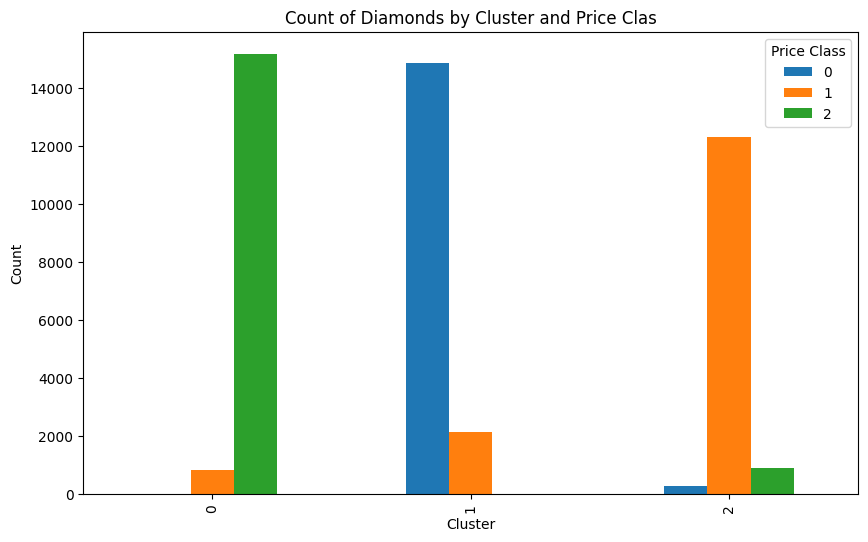

In [ ]:
# Group by cluster and price class
Price_group = df_copy.groupby(['Cluster', 'Price_Class']).size().unstack(fill_value=0)

# Plotting
fig, axe = plt.subplots(figsize=(10, 6))

# Create a bar chart for count of items in each cluster and price class
Price_group.plot(kind='bar', ax=axe)

# Add title and legends
plt.title('Count of Diamonds by Cluster and Price Clas')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Price Class')

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode


In [ ]:
X = df_copy.drop(['Price(in US dollars)', 'Price_Class'], axis=1)  # Features for clustering
y_true = df_copy['Price_Class']  # True labels (Price Class)

# Step 2: Standardize the Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Set k to match the number of price classes
df_copy['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Match Clusters to True Labels
def map_clusters_to_classes(y_true, clusters):
    # Create an array to map clusters to the most frequent true label in that cluster
    labels = np.zeros_like(clusters)
    for i in range(kmeans.n_clusters):
        mask = (clusters == i)
        labels[mask] = mode(y_true[mask])[0]
    return labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
y_pred = map_clusters_to_classes(y_true, df_copy['Cluster'])

# Step 5: Calculate Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # Use weighted average for multi-class
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

In [ ]:
# Print the Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9113
Precision: 0.9129
Recall: 0.9113
F1 Score: 0.9100


**Clustering Evaluation VS Logistic Regression Evaluation:**          

Precision: 0.9129 VS 0.9460

Recall: 0.9113 VS 0.9461

F1 Score: 0.9100 VS  0.95